# FINAL EXAM - A0111350
Ricardo Isac Quintero Sánchez

Connect the Jupyter Notebook to the data source.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Problem 1

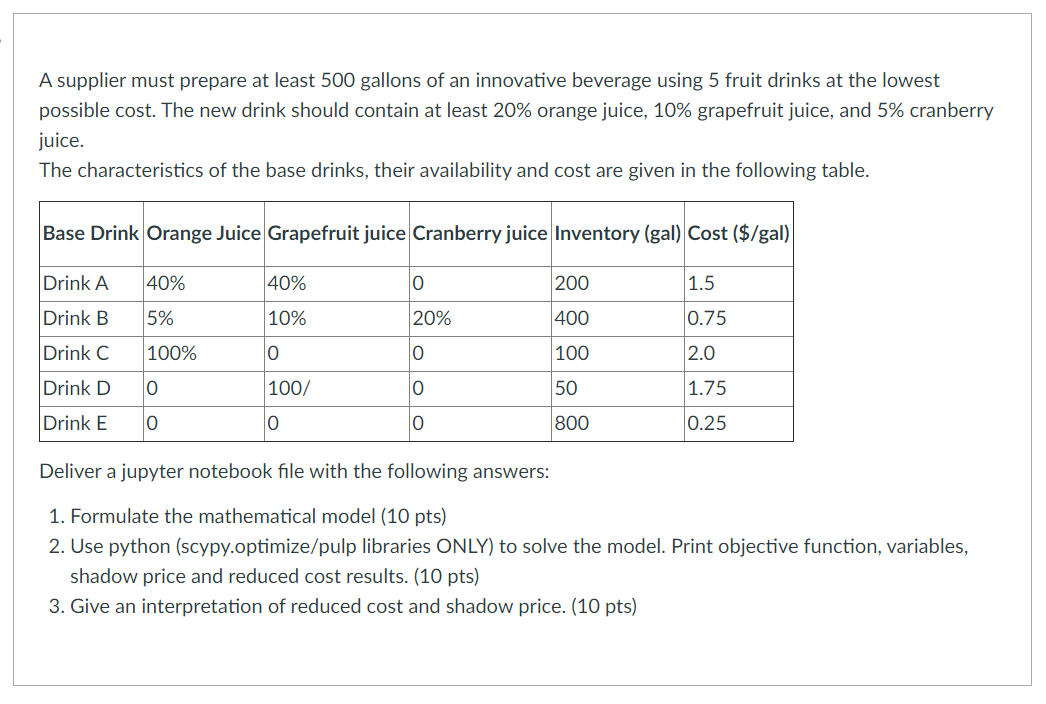

The mathematical model is:

Minimize

$Z = 1.5A + 0.75B + 2C + 1.75D + 0.25E$

Where

$A$: Gallons of Drink A

$B$: Gallons of Drink B

$C$: Gallons of Drink C

$D$: Gallons of Drink D

$E$: Gallons of Drink E

Subject to


$A + B + C + D + E >= 500$

$0.4A + 0.05B + C >= 0.2(A + B + C + D + E)$

$0.4A + 0.1B + D >= 0.1(A + B + C + D + E)$

$0.2B >= 0.05(A + B + C + D + E)$

$A <= 200$

$B <= 400$

$C <= 100$

$D <= 50$

$E <= 800$


$A, B, C, D, E >= 0$


In [2]:
from pulp import *

First, we need to initialize our model.

In [3]:
#Initialize class

model = LpProblem("Minimize_Cost", LpMinimize)

Then, we define the decision variables, objective function and model constraints.

In [4]:
#Decision variables

a = LpVariable('A',0, None)
b = LpVariable('B',0, None)
c = LpVariable('C',0, None)
d = LpVariable('D',0, None)
e = LpVariable('E',0, None)

In [5]:
#Objectve Function

model += 1.5 * a + 0.75 * b + 2 * c + 1.75 * d + 0.25 * e

In [6]:
#Define constraints

model += a + b + c + d + e >= 500
model += 0.4 * a + 0.05 * b + c >= 0.2 * (a + b + c + d + e)
model += 0.4 * a + 0.1 * b + d >= 0.1 * (a + b + c + d + e)
model += 0.2 * b >= 0.05 * (a + b + c + d + e)
model += a <= 200
model += b <= 400
model += c <= 100
model += d <= 50
model += e <= 800

The model is solved to obtain the optimal gallons of each drink to be used in the mixture to produce the desired beverage.

In [7]:
model.solve()
LpStatus[model.status]

'Optimal'

In [8]:
print("TOTAL COST = {}".format(value(model.objective)))
print("Use {} gallons of drink A.".format(a.varValue))
print("Use {} gallons of drink B.".format(b.varValue))
print("Use {} gallons of drink C.".format(c.varValue))
print("Use {} gallons of drink D.".format(d.varValue))
print("Use {} gallons of drink E.".format(e.varValue))

TOTAL COST = 403.125
Use 93.75 gallons of drink A.
Use 125.0 gallons of drink B.
Use 56.25 gallons of drink C.
Use 0.0 gallons of drink D.
Use 225.0 gallons of drink E.


The results show, that under the existing constraints the minimal cost that can be achieved is \$403.125

In order to get that result, drinks A,B,C and E should be added in the proportion that the model states.

That is:

- 93.75 gallons of drink A.
- 125 gallons of drink B.
- 56.25 gallons of drink C.
- 225 gallons of drink E.

It must be noted that drink D is not required to make the beverage, and that in order the minimize cost the model considers that no more than 500 gallons of the mixture should be produced.

In [9]:
for v in model.variables():
    print (v.name, "=", v.varValue, "\tReduced Cost =", v.dj)

o = [{'name':name, 'ShadowPrice':c.pi, 'Slack':c.slack} for name, c in model.constraints.items()]
print(pd.DataFrame(o))

A = 93.75 	Reduced Cost = -4.1633363e-17
B = 125.0 	Reduced Cost = 1.6653345e-16
C = 56.25 	Reduced Cost = -4.1633363e-17
D = 0.0 	Reduced Cost = 0.125
E = 225.0 	Reduced Cost = 1.2490009e-16
  name  ShadowPrice         Slack
0  _C1      0.80625 -0.000000e+00
1  _C2      1.75000 -1.421086e-14
2  _C3      1.37500 -0.000000e+00
3  _C4      1.37500 -3.552714e-15
4  _C5      0.00000  1.062500e+02
5  _C6      0.00000  2.750000e+02
6  _C7      0.00000  4.375000e+01
7  _C8      0.00000  5.000000e+01
8  _C9      0.00000  5.750000e+02


If we analyze the reduced cost from each variable we will notice that the drinks that were chosen show a cost of 0, this means that they are suitable for the model in the amounts defined while solving for the objective function. However, in the specific case of drink D a cost of 0.125 indicates that for every unit added of D into the mixture our model will suffer an increase of \$0.125 to the final cost.

On the other hand, shadow prices indicate the increments that the optimal objective value would suffer per increase in resources defined at each constraint. For instance, we notice that in this model the first four constraints indicate increments in the final cost if the restricting values become larger. That would occur if the minimal desired volume of the final beverage were to be greater than the current 500 gallons because all four constraints are linked to this restriction.

Finally if we look at the slack that each constraint shows we will be able to see how much is left of each resource available at the defined constrins. This is particularly relevant to the final five constraints that correspond the gallons available per drink, indicating that there is sufficient of each drink to produce the beverage at its minimum cost. That is why the shadow price shown at these restrictions is equals to zero implying that they are non-binding, because an increase in capability would not repercute the optimal objective value since there is actually surplus available for the desired production.

# Problem 2

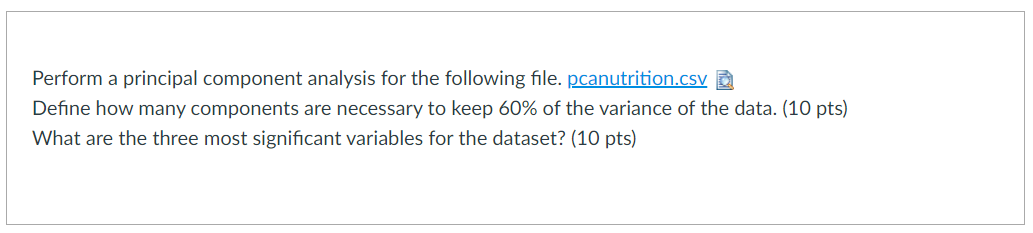

Import the dataset from **pcanutrition.csv**

In [10]:
dfp2=pd.read_csv('pcanutrition.csv')
dfp2

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",305,18.50,25.10,0.00,0.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",111,20.54,0.84,5.41,0.00,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",269,0.00,0.00,73.14,73.20,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",90,16.10,1.40,2.00,0.00,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In order to use the relevant features to the principal component analysis, we must remove string variables that do not contribute to it.

The description, short description, food group and ID variables are not relevant for the PCA beacuse they do not benefit the contrasts and iteraction of variables of interest.

In [11]:
del dfp2['ID']
del dfp2['FoodGroup']
del dfp2['ShortDescrip']
del dfp2['Descrip']

dfp2

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717,0.85,81.11,0.06,0.06,0.0,684,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876,0.28,99.48,0.00,0.00,0.0,840,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353,21.40,28.74,2.34,0.50,0.0,198,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371,23.24,29.68,2.79,0.51,0.0,292,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305,18.50,25.10,0.00,0.00,0.0,47,0.410,12.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111,20.54,0.84,5.41,0.00,0.0,2,0.112,2.15,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269,0.00,0.00,73.14,73.20,0.0,0,0.000,0.00,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90,16.10,1.40,2.00,0.00,0.0,30,0.130,0.50,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


We perform an initial PCA analysis to compute eigenvectors which will give the direction, and compute
eigenvalues, which will give the magnitude for the analyzed dataset.

Data is transformed by normalization to perform this analysis.

In [12]:
ss = StandardScaler().fit_transform(dfp2)
model = PCA(n_components=6)
pca = model.fit_transform(ss)
print("shape of PCA", pca.shape)

shape of PCA (8618, 6)


In the following plot, we can see that the variance explained by each feauture decreases as the number of components increseases.

(The value reported in the Y-axis corresponds to the highest variance explained in the component)

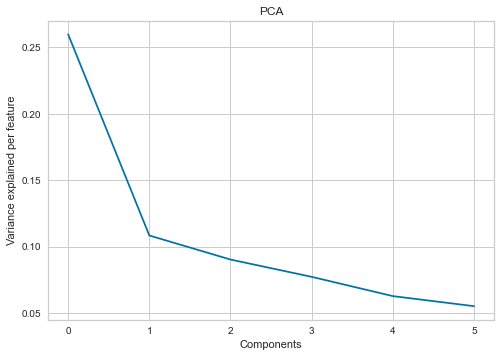

In [13]:
plt.plot(model.explained_variance_ratio_)
plt.title('PCA')
plt.xlabel('Components')
plt.ylabel('Variance explained per feature')
plt.show()

Now, the following cumulative plot seems to show that the first 5 components explain 60% of the variance in the data.

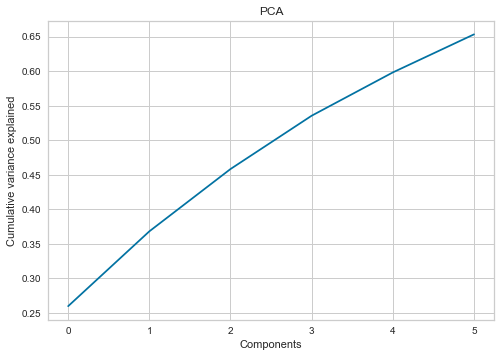

In [14]:
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.title('PCA')
plt.xlabel('Components')
plt.ylabel('Cumulative variance explained')
plt.show()

However, we need to be sure of the cumulative variance explained by the components so we generate the following chart.

In [15]:
var = pd.DataFrame() 
var['Variance Ratio']=model.explained_variance_ratio_
var=pd.DataFrame(var)
var['Cumulative Variance Explained'] = var['Variance Ratio'].cumsum()
var

,Variance Ratio,Cumulative Variance Explained
0,0.259702,0.259702
1,0.108282,0.367984
2,0.090190,0.458174
3,0.077169,0.535342
4,0.062667,0.598009
5,0.055088,0.653098


Since the first five components only explain 59.8% of the total variance, we would need to go further by adding a sixth component to explain at least 60% of the total variance in the data.

In order to identify the three main variables for the dataset we generate the eigenvector of for the first component.

In [16]:
pd.DataFrame(model.components_[0,:],dfp2.columns).sort_values(by=[0],ascending=False)

,0
Riboflavin_mg,0.262413
Riboflavin_USRDA,0.262413
Niacin_mg,0.258820
Niacin_USRDA,0.258820
VitB6_mg,0.240479
VitB6_USRDA,0.240479
Folate_USRDA,0.212663
Folate_mcg,0.212663
Iron_mg,0.207546
Thiamin_mg,0.204839


Therefore, the three most significant variables for the dataset are:


1.   Riboflavin_mg
2.   Riboflavin_USRDA
3.   Niacin_mg



# Problem 3

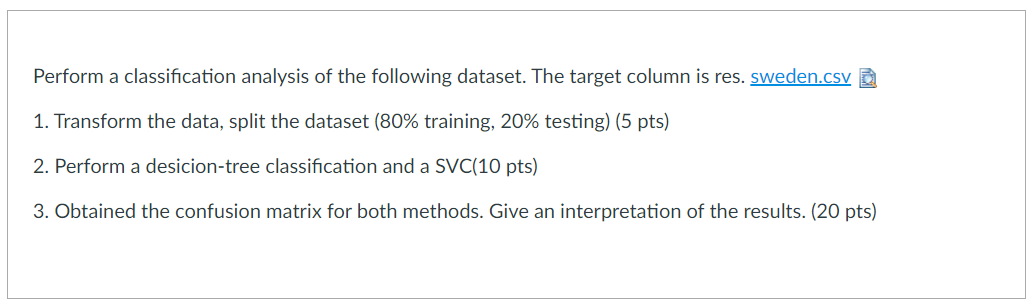

Import the dataset from **sweden.csv**

In [17]:
dfp3=pd.read_csv('sweden.csv')
dfp3

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Sweden,Allsvenskan,2012,31/03/2012,15:00,Elfsborg,Djurgarden,2,1,H,1.71,3.98,5.44,1.73,3.98,5.50,1.66,3.68,5.00
1,Sweden,Allsvenskan,2012,31/03/2012,15:00,GAIS,Hacken,0,0,D,2.21,3.57,3.48,2.50,3.57,3.50,2.25,3.24,3.11
2,Sweden,Allsvenskan,2012,31/03/2012,15:00,Sundsvall,Kalmar,0,1,A,2.72,2.39,2.80,2.75,3.31,2.82,2.64,3.14,2.62
3,Sweden,Allsvenskan,2012,01/04/2012,13:00,AIK,Mjallby,0,0,D,1.75,3.63,5.73,1.75,3.63,5.75,1.71,3.43,4.99
4,Sweden,Allsvenskan,2012,01/04/2012,16:30,Syrianska,Goteborg,2,1,H,5.01,3.49,1.87,5.01,3.65,1.89,4.63,3.41,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,Sweden,Allsvenskan,2019,02/11/2019,12:00,Norrkoping,Djurgarden,2,2,D,3.32,3.06,2.46,3.35,3.30,2.50,3.17,3.07,2.39
1932,Sweden,Allsvenskan,2019,02/11/2019,12:00,Orebro,Malmo FF,0,5,A,15.84,7.53,1.17,17.00,7.60,1.21,13.83,6.96,1.18
1933,Sweden,Allsvenskan,2019,02/11/2019,12:00,Sirius,Kalmar,3,0,H,5.16,4.11,1.66,5.50,4.11,1.77,4.98,3.83,1.66
1934,Sweden,Allsvenskan,2019,06/11/2019,18:00,Brage,Kalmar,0,2,A,3.07,3.25,2.49,3.23,3.38,2.55,2.97,3.13,2.43


The dataset contains information regarding the Swedish Soccer League, in order to use all columns available to generate the classification model we must first turn all non-numeric variables into some that could be used to train and test the model. 

Also, any NaN entries found in the dataframe will be turned into 0 to avoid any problems when handling the data.

In [18]:
objList = dfp3.select_dtypes(include = "object").columns
le = LabelEncoder()
for feat in objList:
    dfp3[feat] = le.fit_transform(dfp3[feat].astype(str))
dfp3.fillna("0", inplace = True)
dfp3

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,0,0,2012,746,8,7,6,2,1,2,1.71,3.98,5.44,1.73,3.98,5.50,1.66,3.68,5.00
1,0,0,2012,746,8,9,12,0,0,1,2.21,3.57,3.48,2.50,3.57,3.50,2.25,3.24,3.11
2,0,0,2012,746,8,26,17,0,1,0,2.72,2.39,2.8,2.75,3.31,2.82,2.64,3.14,2.62
3,0,0,2012,0,2,1,20,0,0,1,1.75,3.63,5.73,1.75,3.63,5.75,1.71,3.43,4.99
4,0,0,2012,0,13,27,11,2,1,2,5.01,3.49,1.87,5.01,3.65,1.89,4.63,3.41,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,0,0,2019,47,0,21,6,2,2,1,3.32,3.06,2.46,3.35,3.30,2.50,3.17,3.07,2.39
1932,0,0,2019,47,0,22,19,0,5,0,15.84,7.53,1.17,17.00,7.60,1.21,13.83,6.96,1.18
1933,0,0,2019,47,0,25,17,3,0,2,5.16,4.11,1.66,5.50,4.11,1.77,4.98,3.83,1.66
1934,0,0,2019,140,17,3,17,0,2,0,3.07,3.25,2.49,3.23,3.38,2.55,2.97,3.13,2.43


Once we have our dataframe ready to be used for construction of our classification model, we need to define our features and target.

In this particular case, all features in the data frame are relevant to the model with the exception of the column Res which corresponds to the ouctome of a match and will serve as target in training and testing the model.

In [19]:
X = dfp3.drop(['Res'],axis=1)
Y = dfp3['Res']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Decision Tree

The first classification approach will be using a decision tree and defining it as follows.

In [20]:
clf = DecisionTreeClassifier()

Then, we need to train our model and use it to test the efficency of the classification.

In [21]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [22]:
pred = clf.predict(X_test)

Once the model has been used to train and test, we must use a confussion matrix to identify whether or not the model was able to correctly classify the matches to their expected results.

The precision of each categorization is seen at the classification report and can also bee percieved by observing the main diagonal of the confusion matrix which indicates the correct attribution of outcomes with their correspondent results.

In [23]:
print(confusion_matrix(Y_test, pred))
print('\n')
print(classification_report(Y_test, pred))

[[129   0   0]
 [  0  92   0]
 [  0   0 167]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00       167

    accuracy                           1.00       388
   macro avg       1.00      1.00      1.00       388
weighted avg       1.00      1.00      1.00       388



The classification matrix shows that the model is accurate at 100% to identify the entries analyzed. However, the implications of having an overfitted model like this are relevant when considering that the model is good at interpretating itself but not at making classification of entries beyond itself such would be the case of a use in forecasting new matches.

Finally, if we look at the decision tree below we will see that the classification is done in a relatively short tree that is able to allocate the matches according to any of the three possible outcomes.

[Text(587.3684210526316, 1009.5428571428572, 'X[7] <= 1.5\ngini = 0.648\nsamples = 1548\nvalue = [458, 406, 684]'),
 Text(367.10526315789474, 854.2285714285715, 'X[8] <= 1.5\ngini = 0.609\nsamples = 815\nvalue = [398, 293, 124]'),
 Text(293.6842105263158, 698.9142857142858, 'X[8] <= 0.5\ngini = 0.592\nsamples = 527\nvalue = [110, 293, 124]'),
 Text(146.8421052631579, 543.6, 'X[7] <= 0.5\ngini = 0.494\nsamples = 223\nvalue = [0, 99, 124]'),
 Text(73.42105263157895, 388.28571428571433, 'gini = 0.0\nsamples = 99\nvalue = [0, 99, 0]'),
 Text(220.26315789473682, 388.28571428571433, 'gini = 0.0\nsamples = 124\nvalue = [0, 0, 124]'),
 Text(440.52631578947364, 543.6, 'X[7] <= 0.5\ngini = 0.462\nsamples = 304\nvalue = [110, 194, 0]'),
 Text(367.10526315789474, 388.28571428571433, 'gini = 0.0\nsamples = 110\nvalue = [110, 0, 0]'),
 Text(513.9473684210526, 388.28571428571433, 'gini = 0.0\nsamples = 194\nvalue = [0, 194, 0]'),
 Text(440.52631578947364, 698.9142857142858, 'gini = 0.0\nsamples = 288

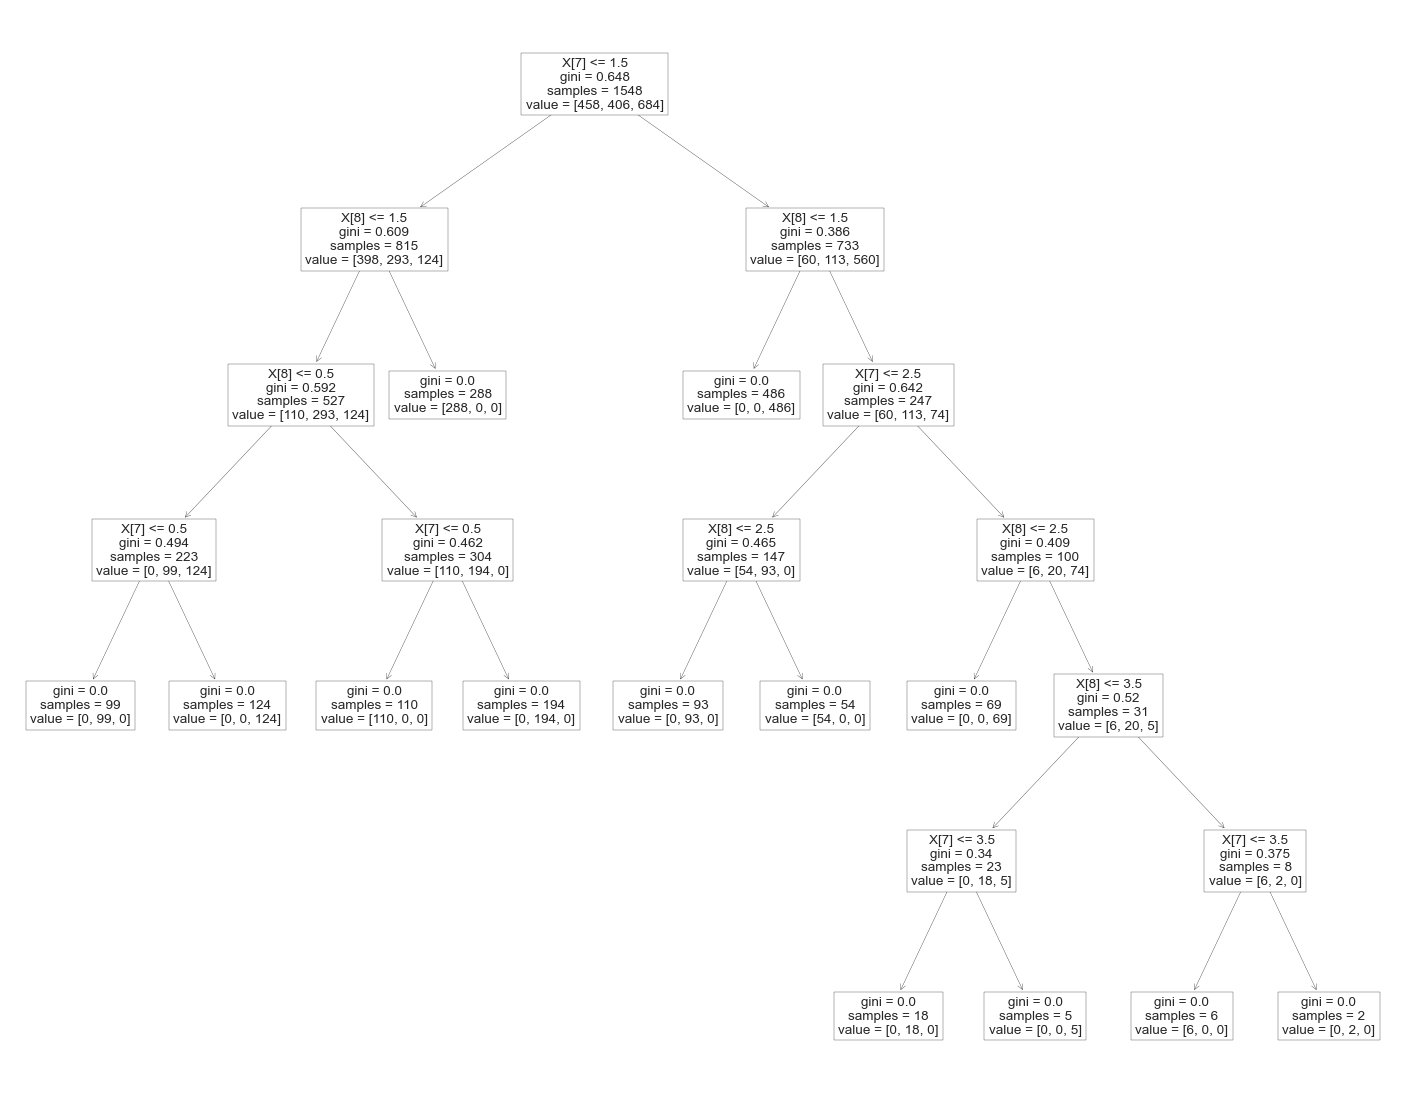

In [24]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf)

## SVC

The second classification approach is a suporting vector classification defined like this:

In [25]:
svc = SVC(kernel='linear')

Then, we need to train our model and use it to test the efficency of the classification.

In [26]:
svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [27]:
pred = svc.predict(X_test)

Once the model has been used to train and test, we must use a confussion matrix to identify whether or not the model was able to correctly classify the matches to their expected results.

In [28]:
print(confusion_matrix(Y_test, pred))
print('\n')
print(classification_report(Y_test, pred))

[[129   0   0]
 [  0  92   0]
 [  0   0 167]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00       167

    accuracy                           1.00       388
   macro avg       1.00      1.00      1.00       388
weighted avg       1.00      1.00      1.00       388



The results shown by the confussion matrix of the application of the simple vector machine to construct the model are consistent with those of the decision tree classifier. The model, at the current amount of features that are being provided to train and test, is overfitted thus bringing an accuracy of 100% when tested. As previously mentioned an overfitted model is biased towards identifying itself and classifying all targets with the use of the features it has, but it's accuracy reduces drastically when tested against information beyond the training and testing sets.

In this particular data set, the main reason behind these results can be attributed to the presence of two variables in concrete: HG and AG. Individually these variables provide partial information regarding match result, however, when both are known the right classification of Result is given. The rest of the features aid the model classify the matches, yet they imply other attributes that correlate in a weaker manner than HG and AG who are strongly correlated to Res. In order to correct this to get a better feel of the performance of the model one could remove them prome the features used to classify, but this would demand the modeler to make a whole new analysis of possible features that would avoid incurring in biases.

# Problem 4

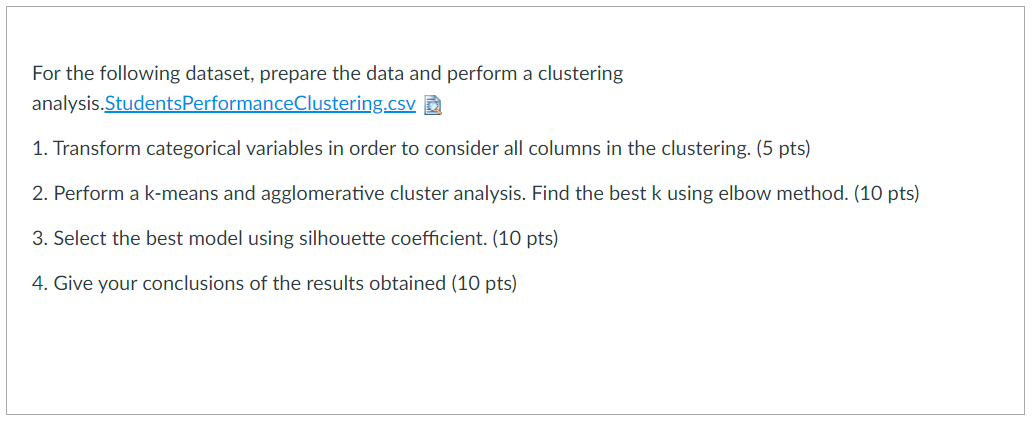

Import the dataset from **StudentsPerformanceClustering.csv**

In [29]:
dfp4= pd.read_csv("StudentsPerformanceClustering.csv")
dfp4

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In order to use all columns, we must transform all categorical columns into numerical to use them for the model.

In [30]:
objList = dfp4.select_dtypes(include = "object").columns
le = LabelEncoder()
for feat in objList:
    dfp4[feat] = le.fit_transform(dfp4[feat].astype(str))
dfp4.fillna("0", inplace = True)
dfp4

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


Once the data has been prepared for modeling, we will scale it into the variable X which will be used for the unsupervised techniques of Kmeans and Agglomerative Clustering analysis.

In [31]:
X=dfp4
scaler = StandardScaler()
X=scaler.fit_transform(X)

## Find the best K using Elbow Method

The Elbow method allows us to identify the k value that best suits the clusters in our set. It uses the error between the centroids of the clusters and looks for the convex point were the distortion score flattens.

In the following graph, a representation of the distortion score vs the number of clusters in the model is done to identify the elbow and select the ideal number clusters.

### Kmeans

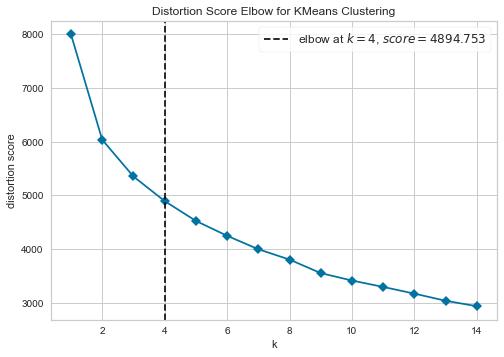

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
model1 = KMeans(random_state=0)
visualizer1 = KElbowVisualizer(model1, k=(1,15),timings = False)
visualizer1.fit(X)
visualizer1.show()

The following plot shows the four clusters suggested by the model when using the three possible grades as reference for grouping.

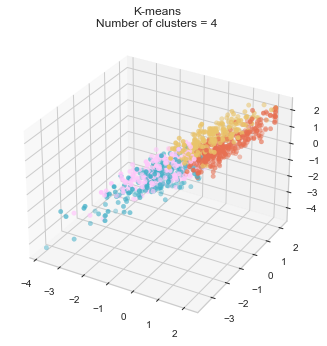

In [33]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

fig = plt.figure()

ax1 = fig.add_subplot(111, projection='3d')
fte_colors = {
0: "#e76f51",
1: "#46b1c9",
2: "#e9c46a",
3: "#ffc8fb",
}

km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(X[:, -1], X[:, -2], X[:, -3], c=km_colors)
ax1.set_title(
"K-means\nNumber of clusters = 4", fontdict={"fontsize": 12}
)
plt.show()

### Agglomerative clustering analysis

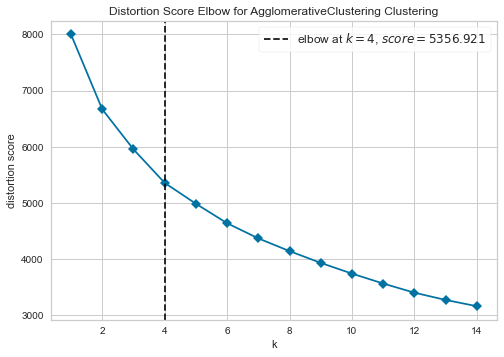

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
model2 = AgglomerativeClustering()
visualizer2 = KElbowVisualizer(model2, k=(1,15),timings = False)
visualizer2.fit(X)
visualizer2.show()

The following plot shows the four clusters suggested by the model when using the three possible grades as reference for grouping.

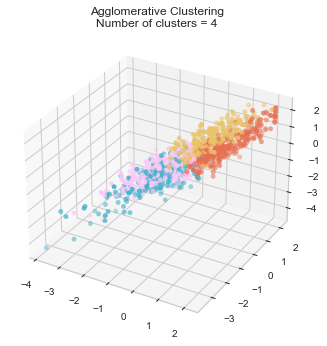

In [35]:
aggclust = AgglomerativeClustering(n_clusters=4)
aggclust.fit(X)

fig = plt.figure()

ax1 = fig.add_subplot(111, projection='3d')
fte_colors = {
0: "#e76f51",
1: "#46b1c9",
2: "#e9c46a",
3: "#ffc8fb",
}

ac_colors = [fte_colors[label] for label in aggclust.labels_]
ax1.scatter(X[:, -1], X[:, -2], X[:, -3], c=km_colors)
ax1.set_title(
"Agglomerative Clustering\nNumber of clusters = 4", fontdict={"fontsize": 12}
)
plt.show()

The results for the Elbow Method applied to both the Kmeans and Agglomerative Clustering model indicate that modeling four clusters would be ideal.

## Select the best model using Silhoutte Coefficient

Another useful analysis can be done using the Silhoute score. The information provided by this coefficient allows for interpretation and validation of consistency in the clusters made from the data.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

**1**: Means clusters are well apart from each other and clearly distinguished.

**0**: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

**-1**: Means clusters are assigned in the wrong way.

### Kmeans

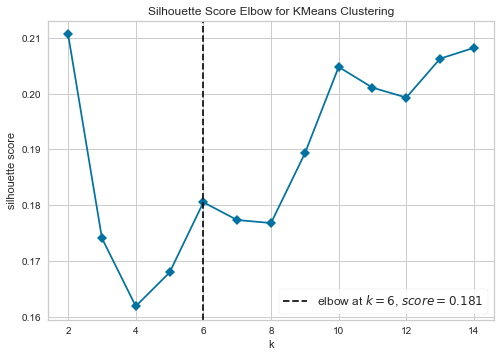

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [36]:
visualizer1 = KElbowVisualizer(model1, k=(2,15), metric='silhouette', timings= False)
visualizer1.fit(X)
visualizer1.show()

The best Silhoutte Coefficient is achieved with 6 clusters. If we look at the progression of the Silouhette score, it seems to grow as the number of clusters increseases. However, the benefit of increasing the number of clusters vs the real increase in score does not grow significantly even when the number of clusters doubles as the one defined by the elbow found by the function.

### Agglomerative clustering analysis

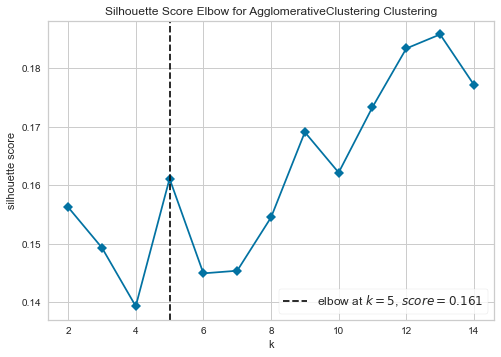

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [37]:
visualizer2 = KElbowVisualizer(model2, k=(2,15), metric='silhouette', timings= False)
visualizer2.fit(X)
visualizer2.show()

The best Silhouette Coefficient is achieved with 5 clusters, and just like with Kmeans the benefit of increasing the number of clusters vs the real increase in score does not grow significantly even when the number of clusters doubles as the one defined by the elbow found by the function.

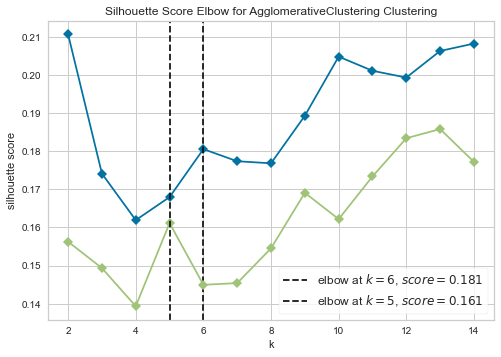

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [38]:
visualizer = KElbowVisualizer(model1, k=(2,15), metric='silhouette', timings= False)
visualizer.fit(X)
visualizer = KElbowVisualizer(model2, k=(2,15), metric='silhouette', timings= False)
visualizer.fit(X)
visualizer.show()

If we contrast the Silhouette scores of both models we will identify that overall Kmeans shows higher consistency in the clusters at any K. Therefore, we can conclude that Kmeans is a better fit for modeling these clusters and that the ideal K proposed by the Elbow Method is 4. However, we must highlight that the K suggested by the elbow in the Silhoute score seems to be higher than that of the Elbow Method and that this has to do with the maximum number clusters being evaluated during the test.